__Libraries__

In [75]:
import os
import shutil
import random
from collections import Counter
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

__Convolutional Neural Network Setup__

In [76]:
file_location = os.getcwd()

train_path = file_location+"/data/train"
valid_path = file_location+"/data/valid"
test_path = file_location+"/data/test"
test_TI_SD1_path = file_location+"/data/TISD1"
test_TI_SD2_path = file_location+"/data/TISD2"

In [77]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD1_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_TI_SD1_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD2_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_TI_SD2_path,target_size=(224,224), batch_size=10, shuffle=False)

Found 330 images belonging to 5 classes.
Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 24 images belonging to 1 classes.
Found 24 images belonging to 1 classes.


In [78]:
mobile = tf.keras.applications.mobilenet.MobileNet()
#mobile.summary()

In [79]:
x = mobile.layers[-1].output
output = Dense(units=5, activation="softmax")(x)

In [80]:
model = Model(inputs=mobile.input, outputs=output)

In [81]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [82]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

__Train model__

In [83]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [84]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=50, verbose = 2)

Epoch 1/50
33/33 - 24s - loss: 1.6010 - accuracy: 0.3545 - val_loss: 1.5971 - val_accuracy: 0.3867 - 24s/epoch - 715ms/step
Epoch 2/50
33/33 - 33s - loss: 1.5742 - accuracy: 0.6697 - val_loss: 1.5929 - val_accuracy: 0.3867 - 33s/epoch - 996ms/step
Epoch 3/50
33/33 - 45s - loss: 1.5581 - accuracy: 0.7970 - val_loss: 1.5890 - val_accuracy: 0.3867 - 45s/epoch - 1s/step
Epoch 4/50
33/33 - 38s - loss: 1.5450 - accuracy: 0.8667 - val_loss: 1.5794 - val_accuracy: 0.4533 - 38s/epoch - 1s/step
Epoch 5/50
33/33 - 27s - loss: 1.5378 - accuracy: 0.8788 - val_loss: 1.5684 - val_accuracy: 0.6000 - 27s/epoch - 824ms/step
Epoch 6/50
33/33 - 23s - loss: 1.5287 - accuracy: 0.9182 - val_loss: 1.5666 - val_accuracy: 0.5600 - 23s/epoch - 705ms/step
Epoch 7/50
33/33 - 24s - loss: 1.5196 - accuracy: 0.9364 - val_loss: 1.5656 - val_accuracy: 0.4933 - 24s/epoch - 742ms/step
Epoch 8/50
33/33 - 22s - loss: 1.5125 - accuracy: 0.9333 - val_loss: 1.5549 - val_accuracy: 0.5600 - 22s/epoch - 666ms/step
Epoch 9/50
33/

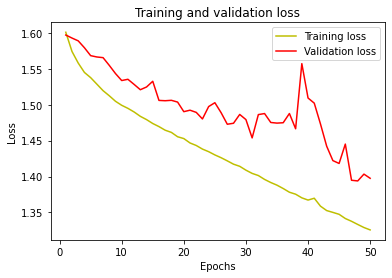

In [85]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

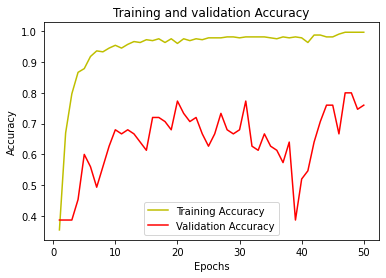

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

__Predictions for Test Data__

In [96]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [97]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose = 0)

Confusion Matrix without normalization
[[5 0 0 0 0]
 [2 3 0 0 0]
 [0 0 5 0 0]
 [0 0 0 4 1]
 [0 1 0 0 4]]


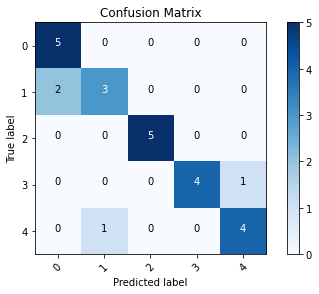

In [98]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#test_batches.class_indices
cm_plot_labels = ["0","1","2","3","4"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

__Predictions for Textual Inversion Trained Stable Diffusion 2 generated data__

In [99]:
#TISD1 were images created by Stable Diffusion with prompt: "<Cézanne> landscape painting"
TISD1_labels = TISD1_batches.classes

In [100]:
predictions = model.predict(x=TISD1_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({4: 8, 0: 5, 1: 2, 3: 9})

In [101]:
predictions

array([[0.19317651, 0.17363593, 0.17917988, 0.19765814, 0.25634953],
       [0.19220196, 0.17258006, 0.17586823, 0.18189558, 0.27745408],
       [0.22716014, 0.18358278, 0.18217245, 0.18815266, 0.21893199],
       [0.25806588, 0.1766907 , 0.18146874, 0.19251741, 0.19125731],
       [0.19422677, 0.17173302, 0.1755684 , 0.1813085 , 0.27716324],
       [0.27176768, 0.17557654, 0.17835441, 0.18454489, 0.1897565 ],
       [0.19220181, 0.17522416, 0.1765365 , 0.18773352, 0.26830405],
       [0.19916429, 0.17985898, 0.1888018 , 0.21244879, 0.21972615],
       [0.2523056 , 0.17668685, 0.18050718, 0.18530492, 0.20519552],
       [0.19644153, 0.24674208, 0.17998303, 0.19682474, 0.18000868],
       [0.19224048, 0.17147867, 0.1753725 , 0.18111357, 0.2797948 ],
       [0.18455811, 0.17262916, 0.18586771, 0.25386924, 0.20307578],
       [0.18208498, 0.16843404, 0.1777638 , 0.27076307, 0.20095405],
       [0.18276608, 0.16946986, 0.18049416, 0.2659202 , 0.20134966],
       [0.1816698 , 0.1671322 , 0.

In [102]:
#TISD2 were images created by Stable Diffusion with prompt: "<Cézanne>"
TISD2_labels = TISD2_batches.classes

In [103]:
predictions = model.predict(x=TISD2_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({3: 11, 0: 12, 1: 1})

In [104]:
predictions

array([[0.18166846, 0.16712862, 0.17757154, 0.27239206, 0.20123927],
       [0.18846904, 0.17014539, 0.1936475 , 0.25621897, 0.19151905],
       [0.18980178, 0.18797007, 0.19706662, 0.22412744, 0.201034  ],
       [0.27295724, 0.17625047, 0.17851877, 0.18283561, 0.18943794],
       [0.23009259, 0.17410152, 0.18666545, 0.21729136, 0.19184905],
       [0.2638959 , 0.1804982 , 0.1812153 , 0.18446235, 0.18992831],
       [0.19493514, 0.22893807, 0.19952987, 0.19506083, 0.18153602],
       [0.18166772, 0.16712661, 0.17757091, 0.2723953 , 0.20123942],
       [0.23861527, 0.19483988, 0.18614241, 0.18866307, 0.19173928],
       [0.18328011, 0.17014007, 0.21171029, 0.24458097, 0.19028856],
       [0.18226989, 0.16880633, 0.17862594, 0.26909947, 0.20119828],
       [0.23555471, 0.19084129, 0.18573985, 0.19550547, 0.19235878],
       [0.24459475, 0.1930945 , 0.18358462, 0.188667  , 0.19005916],
       [0.20733951, 0.17095481, 0.17917527, 0.24338603, 0.19914442],
       [0.27372184, 0.17566606, 0.